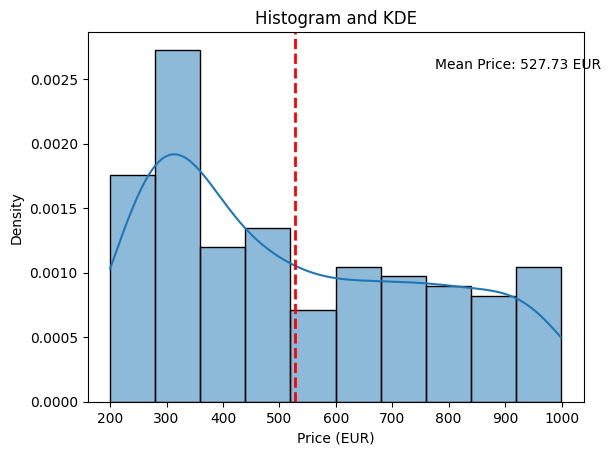

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import seaborn as sns


# Set up Chrome WebDriver with headless option
chrome_options = Options()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome(options=chrome_options)

# Loop through pages 1 to .. and extract prices

search_term = "Macbook Pro"
Nopages = 50
upper_limit = 5000
lower_limit = 200
search = search_term.replace(" ", "-")


prices = []

for page_num in range(1, Nopages):
    url = f'https://www.ebay-kleinanzeigen.de/s-seite:{page_num}/{search}/k0'
    driver.get(url)
    aditems = driver.find_elements(By.XPATH, '//article[@class="aditem"]')
    for aditem in aditems:
        price_elem = aditem.find_element(By.XPATH, './/p[@class="aditem-main--middle--price-shipping--price"]')
        price = price_elem.text.strip()
        if 'VB' in price or price == 'Zu verschenken':
            continue  # Skip variable prices and "Zu verschenken"
        price_num_str = price.replace(',', '.').replace(' €', '')  # Remove comma and euro sign
        if price_num_str == '':
            continue  # Skip empty strings
        price_num = float(price_num_str)  # Convert to float
        prices.append(price_num)

# Quit the browser
driver.quit()

# Convert prices to Pandas Series and filter by limits
s = pd.Series(prices, name='Price')

s = s[(s >= lower_limit) & (s <= upper_limit)]

# Plot histogram with KDE
mean_price = s.mean()
sns.histplot(s, bins=10, kde=True, stat='density')
plt.axvline(x=mean_price, color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Price (EUR)')
plt.ylabel('Density')
plt.title('Histogram and KDE')
plt.text(0.7, 0.9, f'Mean Price: {mean_price:.2f} EUR', transform=plt.gca().transAxes)
plt.show()


In [51]:
print(s)

0      300.0
2      749.0
3      500.0
4      299.0
5      999.0
       ...  
612    625.0
613    600.0
614    290.0
616    399.0
618    220.0
Name: Price, Length: 335, dtype: float64
